In [116]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def variablePend(y,t,w,g,a):
    theta, alpha = y
    dydt = [alpha, alpha*2*w*np.tan(w*t) - g*np.sin(theta)/(a*np.cos(w*t))]
    return dydt

In [118]:
def approxVariablePend(y,t,w,g,a):
    theta, alpha = y
    dydt = [alpha, alpha*2*w*np.tan(w*t) - g*theta/(a*np.cos(w*t))]
    return dydt

In [119]:
def correctVariablePend(y,t,w,g,A,ell0):
    theta, alpha = y
    dydt = [alpha, 2*A*w*np.sin(w*t)*alpha/(ell0+A*np.cos(w*t)) - g*np.sin(theta)/(ell0+A*np.cos(w * t))]
    return dydt

In [120]:
def approxFixedPend(y,t,w,g,a):
    #let r = dqdt
    theta, alpha = y
    dydt = [alpha, -g*theta/a]
    return dydt

In [121]:
def fixedPend(y,t,w,g,a):
    #let r = dqdt
    theta, alpha = y
    dydt = [alpha, -g*np.sin(theta)/a]
    return dydt

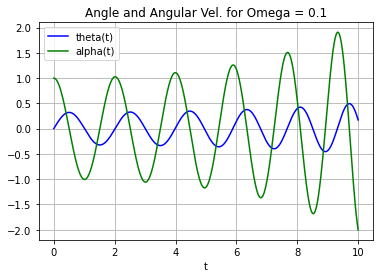

In [122]:
y0 = [0, 1]
t = np.linspace(0,10,1000)
w = 0.1
g = 9.8
a = 1
sol = odeint(variablePend, y0, t, args=(w,g,a), rtol=1e-10)
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='alpha(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Angle and Angular Vel. for Omega = ' + str(w))
plt.grid()
plt.show()

C:\Users\kxing\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


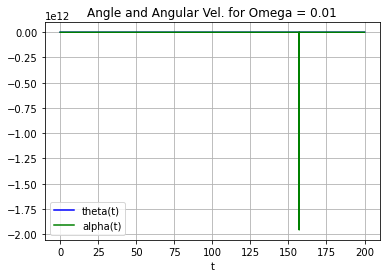

In [123]:
y0 = [0, 1]
t = np.linspace(0,200,1000000)
w = 0.01
g = 9.8
a = 1
sol = odeint(approxVariablePend, y0, t, args=(w,g,a), rtol=1e-10)
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='alpha(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Angle and Angular Vel. for Omega = ' + str(w))
plt.grid()
plt.show()

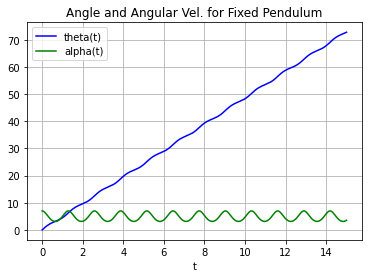

In [124]:
y0 = [0, 7]
t = np.linspace(0,15,1001)
w = 1
g = 9.8
a = 1
sol = odeint(fixedPend, y0, t, args=(w,g,a), rtol=1e-10)
sol2 = odeint(approxFixedPend, y0, t, args=(w,g,a), rtol=1e-10)

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='alpha(t)')
# plt.plot(t, sol2[:, 0], 'r', label='approx_theta(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Angle and Angular Vel. for Fixed Pendulum')
plt.grid()
plt.show()

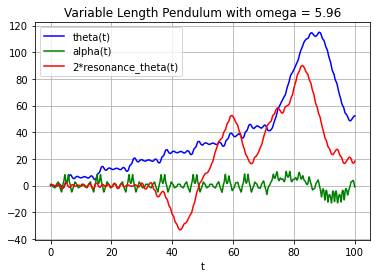

In [263]:
y0 = [0, 1]
t = np.linspace(0,100,100001)
w0 = np.sqrt(9.8)*2
w = 5.96
g = 9.8
A = 0.2
ell0 = 1
sol = odeint(correctVariablePend, y0, t, args=(w,g,A,ell0), rtol=1e-14)
# sol2 = odeint(fixedPend, y0, t, args=(w,g,A), rtol=1e-10)
sol1 = odeint(correctVariablePend, y0, t, args=(w0,g,A,ell0), rtol=1e-10)


plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='alpha(t)')
plt.plot(t, sol1[:, 0], 'r', label='2*resonance_theta(t)')
# plt.plot(t, sol1[:, 1], 'm', label='2*resonance_alpha(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Variable Length Pendulum with omega = ' + str(w))
plt.grid()
plt.show()

In [261]:
y0 = [0, 1]
t = np.linspace(0,25,10000)
w = np.sqrt(9.8)*2
g = 9.8
A = 0.2
ell0 = 1
thetaMax = (0,0)
alphaMax = (0,0)
for i in np.linspace(0, 10, 100):
    sol = odeint(correctVariablePend, y0, t, args=(i,g,A,ell0), rtol=1e-10)
    currTheta = np.amax(sol[:,0])
    currAlpha = np.amax(sol[:,1])
    if currTheta > thetaMax[0]:
        thetaMax = (currTheta,i)
    if currAlpha > alphaMax[0]:
        alphaMax = (currAlpha,i)

print(thetaMax)
print(alphaMax)

(14.377705187176367, 5.959595959595959)
(10.62893840995322, 5.454545454545454)
